In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## Question 1 (Intensity transformation)

#

In [2]:
# creating transformation points
pts = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, pts[0, 1], pts[0, 0] + 1 - 0).astype(np.uint8)
t2 = np.linspace(pts[0, 1] + 1, pts[1, 1], pts[1, 0] - pts[0, 0]).astype(np.uint8)
t3 = np.linspace(pts[1, 1] + 1, pts[2, 1], pts[2, 0] - pts[1, 0]).astype(np.uint8)
t4 = np.linspace(pts[2, 1] + 1, pts[3, 1], pts[3, 0] - pts[2, 0]).astype(np.uint8)
t5 = np.linspace(pts[3, 1] + 1, 255, 255 - pts[3, 0]).astype(np.uint8)

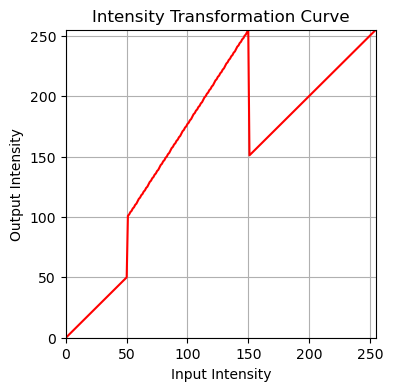

In [3]:
# Creating transformation
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(x, transform, color='red')
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()

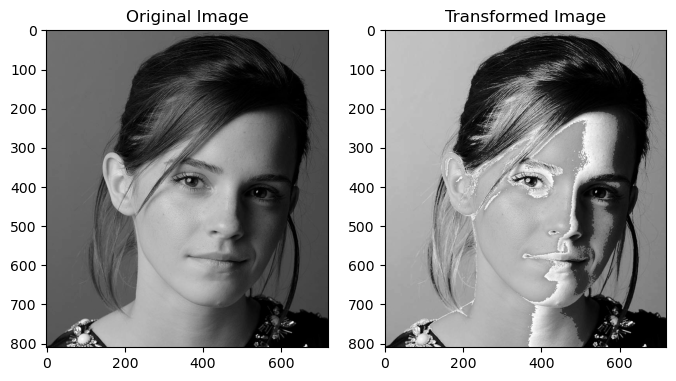

In [4]:
# Transform the image
img_1 = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img_1, transform)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
plt.show()

## Question 2

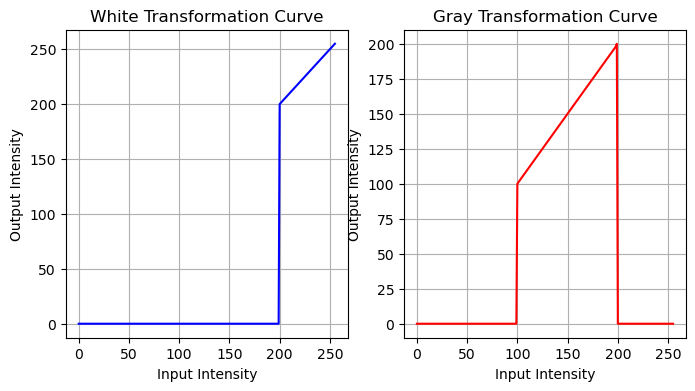

In [6]:
# Creating transformations

white_t = np.linspace(200, 255, 56).astype(np.uint8)
white_t = np.concatenate((np.zeros(200, dtype=np.uint8), white_t), axis=0).astype(np.uint8)

gray_t = np.linspace(100, 200, 100).astype(np.uint8)
gray_t = np.concatenate((np.zeros(100, dtype=np.uint8),gray_t, np.zeros(56, dtype=np.uint8)), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting white and grey transformations curves
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, white_t, color='blue')
ax[0].set_title("White Transformation Curve")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[0].grid(True)

ax[1].plot(x, gray_t, color='red')
ax[1].set_title("Gray Transformation Curve")
ax[1].set_xlabel("Input Intensity")
ax[1].set_ylabel("Output Intensity")
ax[1].grid(True)

plt.show()


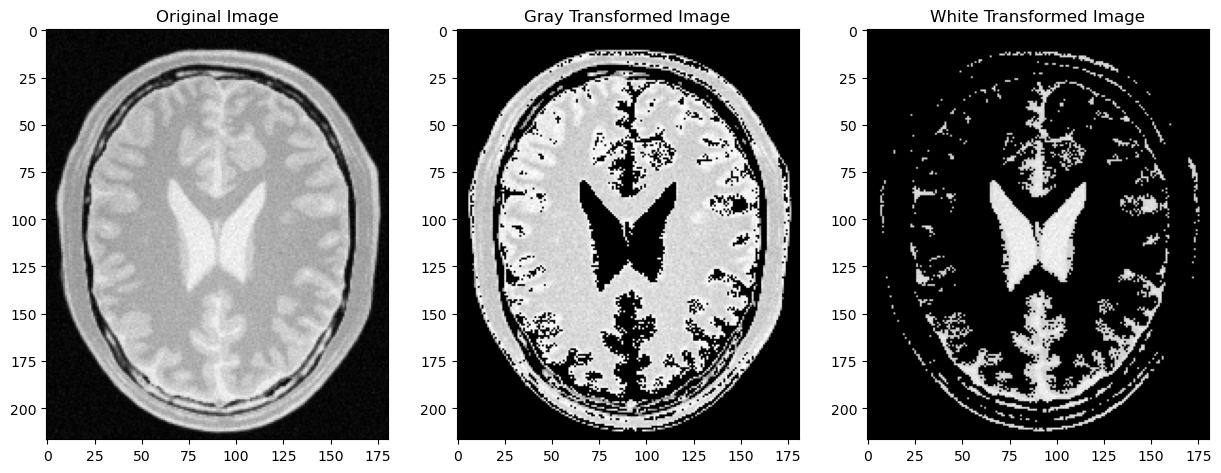

In [7]:
img2 = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

gray_transformed = cv.LUT(img2, gray_t)
white_transformed = cv.LUT(img2, white_t)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(gray_transformed, cmap='gray')
ax[1].set_title('Gray Transformed Image')
ax[2].imshow(white_transformed, cmap='gray')
ax[2].set_title('White Transformed Image')
plt.show()

## Question 03

In [7]:
# Gamma correction in L - channel

gamma = 0.7
img3 = cv.imread("a1images/highlights_and_shadows.jpg", cv.IMREAD_COLOR)

L, a, b = cv.split(cv.cvtColor(img3, cv.COLOR_BGR2LAB))

gamma_t = np.array([(j / 255.0)**gamma * 255 for j in range(256)]).astype(np.uint8)
L_corrected = cv.LUT(L, gamma_t)

merged = cv.merge((L_corrected, a, b))
img3_modified = cv.cvtColor(merged, cv.COLOR_LAB2BGR)

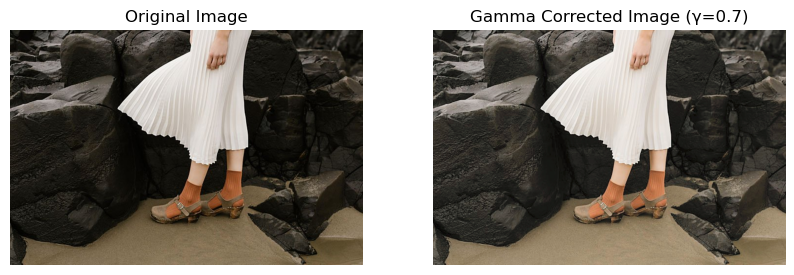

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img3_modified, cv.COLOR_BGR2RGB))
ax[1].set_title(f"Gamma Corrected Image (γ={gamma})")
ax[1].axis("off")

plt.show()

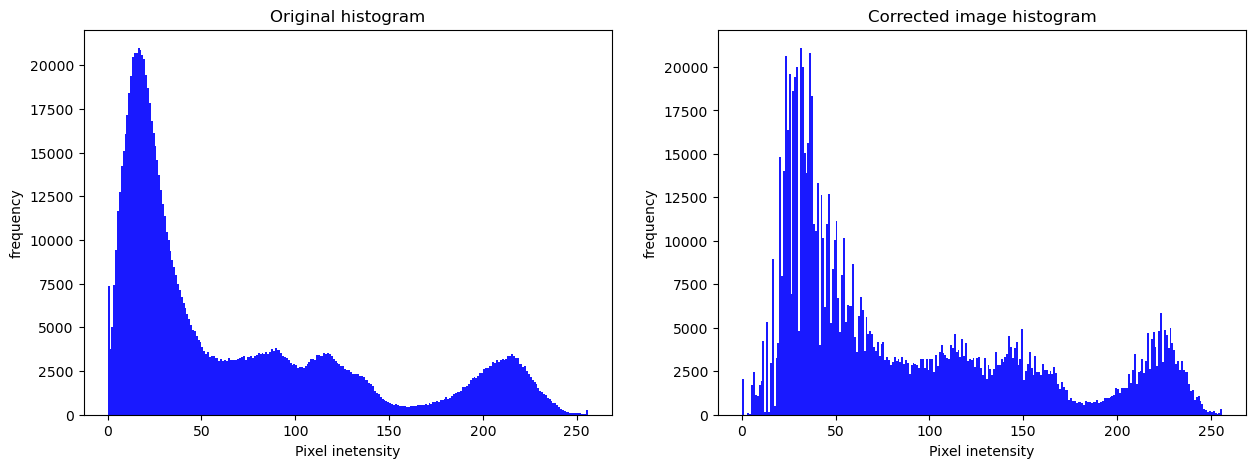

In [21]:
# Plotting histograms

img3_hist = img3.ravel()
img3_modified_hist = img3_modified.ravel()

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].hist(img3_hist, bins=256, range=(0, 256), alpha=0.9, color='blue')
ax[0].set_title("Original histogram")
ax[0].set_xlabel('Pixel inetensity')
ax[0].set_ylabel('frequency')

ax[1].hist(img3_modified_hist, bins=256, range=(0, 256), alpha=0.9, color='blue')
ax[1].set_title("Corrected image histogram")
ax[1].set_xlabel('Pixel inetensity')
ax[1].set_ylabel('frequency')

plt.show()

## Question 4

In [10]:
# Vibrance Transformation function

a = 0.5    # Assume
sigma = 70 # Given
vib_t = np.array([min((x + (a * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)

    

### part (a)

In [11]:
img4 = cv.imread("a1images/spider.png", cv.IMREAD_COLOR_BGR)

In [12]:
img4_rgb = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
h, s, v = cv.split(cv.cvtColor(img4, cv.COLOR_BGR2HSV))

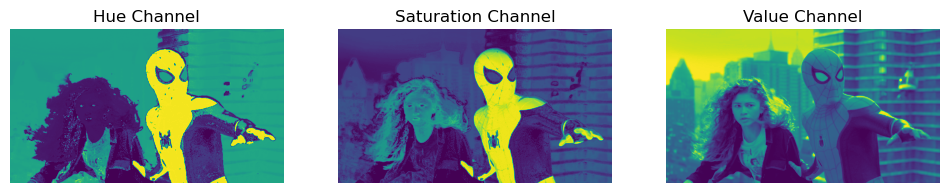

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(h)
ax[0].set_title("Hue Channel")
ax[0].axis("off")
ax[1].imshow(s)
ax[1].set_title("Saturation Channel")
ax[1].axis("off")
ax[2].imshow(v)
ax[2].set_title("Value Channel")
ax[2].axis("off")

plt.show()

### part (b)

In [14]:
sat_trans = cv.LUT(s, vib_t)

### part (c)

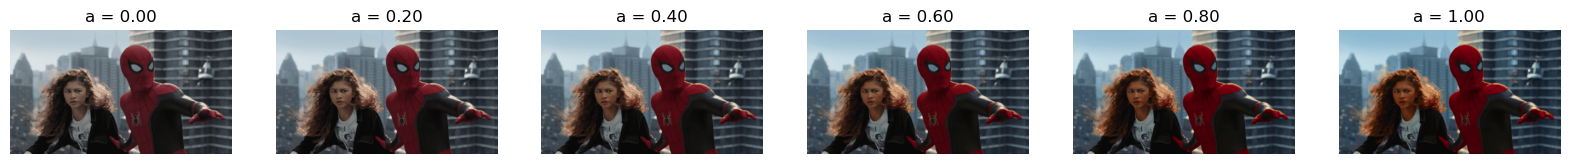

In [16]:
a_values = np.linspace(0, 1, 6)
fig, ax = plt.subplots(1, len(a_values),figsize=(20, 20))

for i, a in enumerate(a_values):
    vib_t = np.array([min((x + (a * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)
    sat_trans = cv.LUT(s, vib_t)
    img = cv.merge([h, sat_trans, v])
    img = cv.cvtColor(img, cv.COLOR_HSV2RGB)
    ax[i].imshow(img)
    ax[i].set_title(f'a = {a:.2f}')
    ax[i].axis('off')
plt.show()


### part (d)

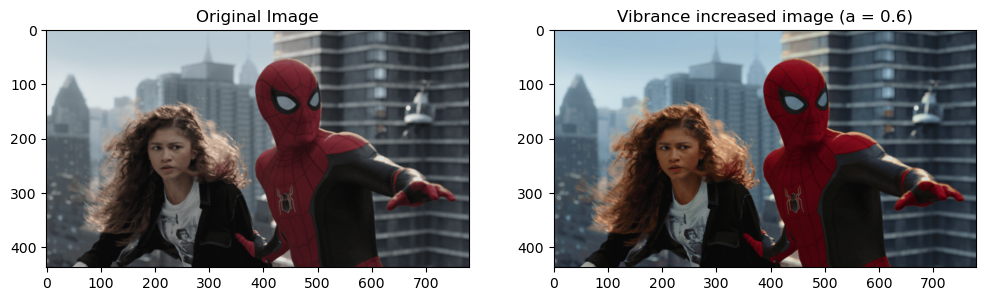

In [17]:
# suitable a value = 0.6
vib_t_final = np.array([min((x + (0.6 * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)

sat_trans_final = cv.LUT(s, vib_t_final)
img_final = cv.merge([h, sat_trans_final, v])
img_final = cv.cvtColor(img_final, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(img4_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(img_final)
ax[1].set_title("Vibrance increased image (a = 0.6)")

plt.show()

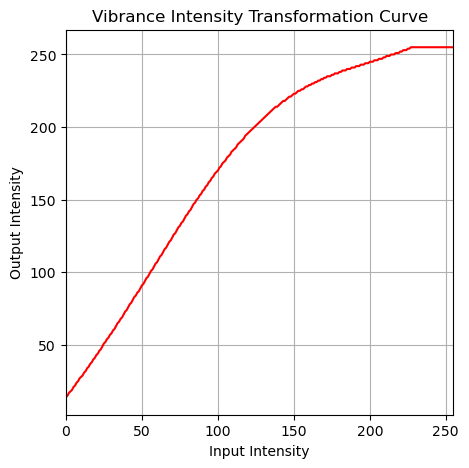

In [18]:
x = np.arange(256)

fig = plt.figure(figsize=(5, 5))
plt.plot(x, vib_t_final, color='red')
plt.title("Vibrance Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

## Question 5

In [19]:
img5 = cv.imread("a1images/shells.tif", cv.IMREAD_GRAYSCALE)

print(np.dtype(img5[0][0]), img5.shape)

uint8 (500, 500)


In [25]:
def hist_eq(img):
    # define constants
    L = 2 ** 8 # 8-bit image
    (M, N) = img.shape

    hist = cv.calcHist([img], [0], None, [L], [0, L])
    cdf = hist.cumsum()

    t = np.array([(L - 1) / (M * N) * (cdf[j]) for j in range(256)]).astype(np.uint8)

    img_eq = cv.LUT(img, t)

    return img_eq

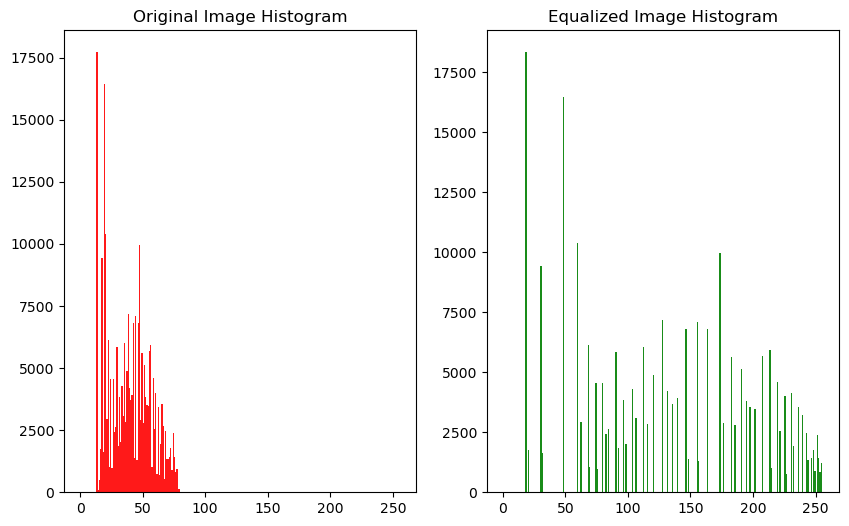

In [31]:
img_eq = hist_eq(img5)

img_eq_hist = img_eq.ravel()
img5_hist = img5.ravel()

fig, ax = plt.subplots(1, 2, figsize=(10,6))

ax[0].hist(img5_hist, bins=256, range=(0, 256), alpha=0.9, color='red')
ax[0].set_title("Original Image Histogram")
ax[1].hist(img_eq_hist, bins=256, range=(0, 256), alpha=0.9, color='green')
ax[1].set_title("Equalized Image Histogram")

plt.show()


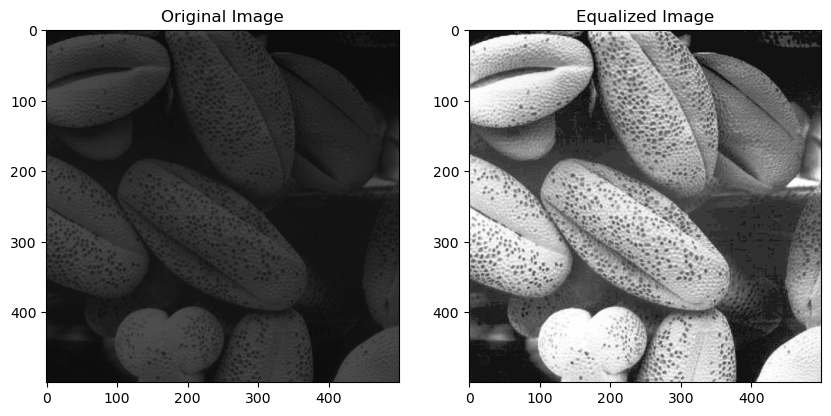

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

ax[0].imshow(img5, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(img_eq, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Equalized Image")

plt.show()

## Question 6

### part (a)

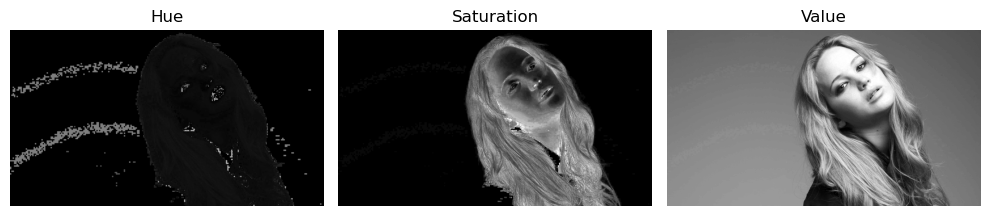

In [2]:
img6 = cv.imread("a1images/jeniffer.jpg", cv.IMREAD_COLOR)
img6_rgb = cv.cvtColor(img6, cv.COLOR_BGR2RGB)

im_H, im_S, im_V = cv.split(cv.cvtColor(img6, cv.COLOR_BGR2HSV))

fig, ax = plt.subplots(1, 3, figsize=(10,10))

ax[0].imshow(im_H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Hue")
ax[0].axis("off")

ax[1].imshow(im_S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Saturation")
ax[1].axis("off")

ax[2].imshow(im_V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Value")
ax[2].axis("off")

plt.tight_layout()
plt.show()

### part (b)

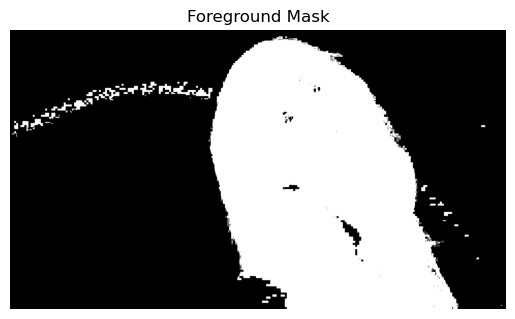

In [4]:
# Apply threshold in Value plane
_, foreground_mask = cv.threshold(im_S, 10, 255, cv.THRESH_BINARY)

plt.imshow(foreground_mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis("off")
plt.show()

### part (c)

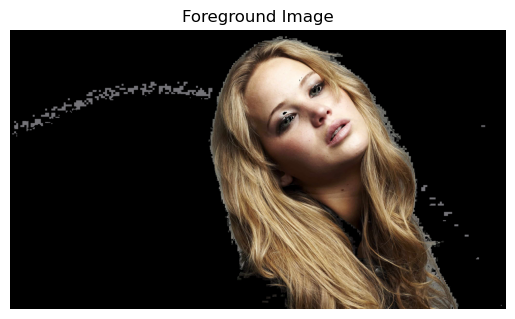

(2160, 3840, 3) uint8


In [5]:
img6_fg = cv.bitwise_and(img6,img6,mask = foreground_mask)

plt.imshow(cv.cvtColor(img6_fg, cv.COLOR_BGR2RGB))
plt.title("Foreground Image")
plt.axis("off")
plt.show()

print(img6_fg.shape, img6_fg.dtype)

In [13]:
# Using Value channel of foreground image for histogram equalization

fg_hsv = cv.cvtColor(img6_fg, cv.COLOR_BGR2HSV)
fg_h, fg_s, fg_v = cv.split(fg_hsv)


In [18]:
L = 2 ** 8
fg_v_hist = cv.calcHist([fg_v], [0], None, [L], [0, L])

### part (d)

In [19]:
csum = np.cumsum(fg_v_hist)
csum[-1]

8294400.0

### part (e)

In [20]:
(M, N) = img6_fg.shape[:2]

hist_t = np.array([(L - 1) / (M * N) * csum[j] for j in range(256)]).astype(np.uint8)

fg_v_eq = cv.LUT(fg_v, hist_t)

print(M*N)

8294400


### part (f)

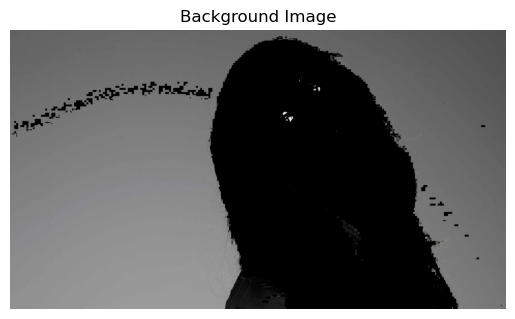

In [21]:
background_mask = cv.bitwise_not(foreground_mask)

img6_bg = cv.bitwise_and(img6, img6, mask=background_mask)

plt.imshow(cv.cvtColor(img6_bg, cv.COLOR_BGR2RGB))
plt.title("Background Image")
plt.axis("off")
plt.show()

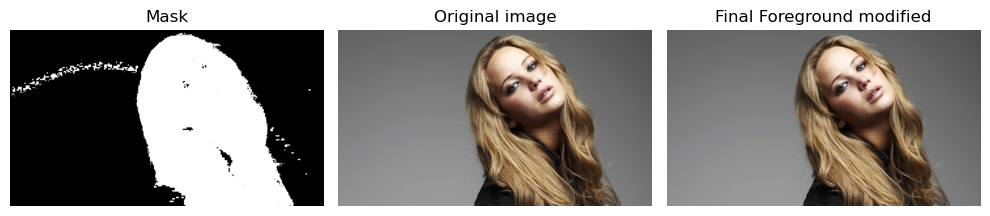

In [26]:
img6_fg_hsv = cv.merge((fg_h, fg_s, fg_v_eq))
img6_fg_rgb = cv.cvtColor(img6_fg_hsv, cv.COLOR_HSV2RGB)
img6_final = cv.add(cv.cvtColor(img6_bg, cv.COLOR_BGR2RGB), cv.cvtColor(img6_fg, cv.COLOR_BGR2RGB))

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(foreground_mask, cmap='gray')
ax[0].set_title("Mask")
ax[0].axis("off")

ax[1].imshow(img6_rgb)
ax[1].set_title("Original image")
ax[1].axis("off")

ax[2].imshow(img6_final)
ax[2].set_title("Final Foreground modified")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Question 7

### part (a)

In [74]:
img7 = cv.imread("a1images/einstein.png", cv.IMREAD_GRAYSCALE)

In [75]:

sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]], dtype=np.float32)

img7_x1 = cv.filter2D(img7, cv.CV_64F, sobel_x)
img7_y1 = cv.filter2D(img7, cv.CV_64F, sobel_y)


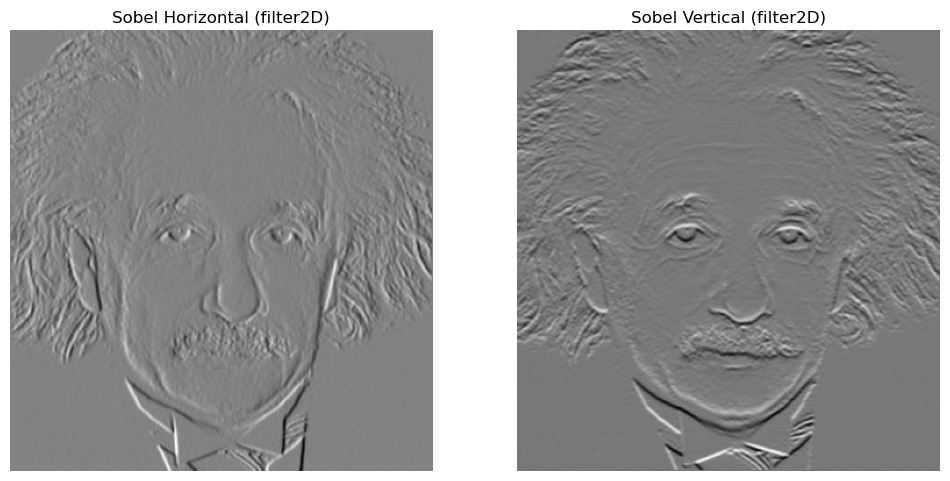

In [76]:
# Plotting the results

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(img7_x1, cmap='gray')
ax[0].set_title("Sobel Horizontal (filter2D)")
ax[0].axis("off")

ax[1].imshow(img7_y1, cmap='gray')
ax[1].set_title("Sobel Vertical (filter2D)")
ax[1].axis("off")

plt.show()

### part (b)

In [17]:
# Own function to Sobel filter using for loop

def sobel_filter(img):
    sobel_x = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[1, 2, 1], 
                        [0, 0, 0], 
                        [-1, -2, -1]], dtype=np.float32)

    img_x = np.zeros_like(img, dtype=np.float32)
    img_y = np.zeros_like(img, dtype=np.float32)

    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            region = img[i-1:i+2, j-1:j+2]
            img_x[i, j] = np.sum(region * sobel_x)
            img_y[i, j] = np.sum(region * sobel_y)

    return img_x, img_y

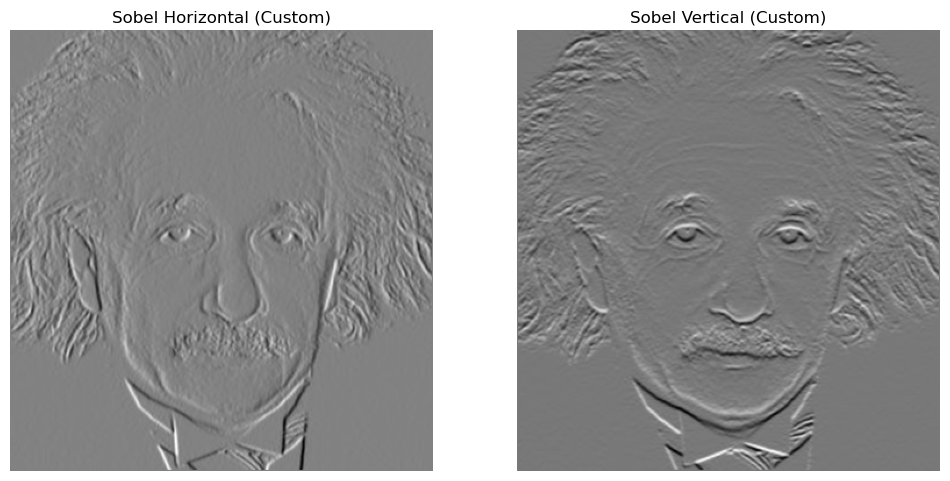

In [19]:
img7_x2, img7_y2 = sobel_filter(img7)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(img7_x2, cmap='gray')
ax[0].set_title("Sobel Horizontal (Custom)")
ax[0].axis("off")

ax[1].imshow(img7_y2, cmap='gray')
ax[1].set_title("Sobel Vertical (Custom)")
ax[1].axis("off")

plt.show()

### part (c)

In [20]:
array1 = np.array([[1], [2], [1]])
array2 = np.array([[-1, 0, 1]])

sobel_x_filter = array1 @ array2

array3 = np.array([[-1], [0], [1]])
array4 = np.array([[1, 2, 1]])

sobel_y_filter = array3 @ array4

print(sobel_x_filter)
print(sobel_y_filter)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


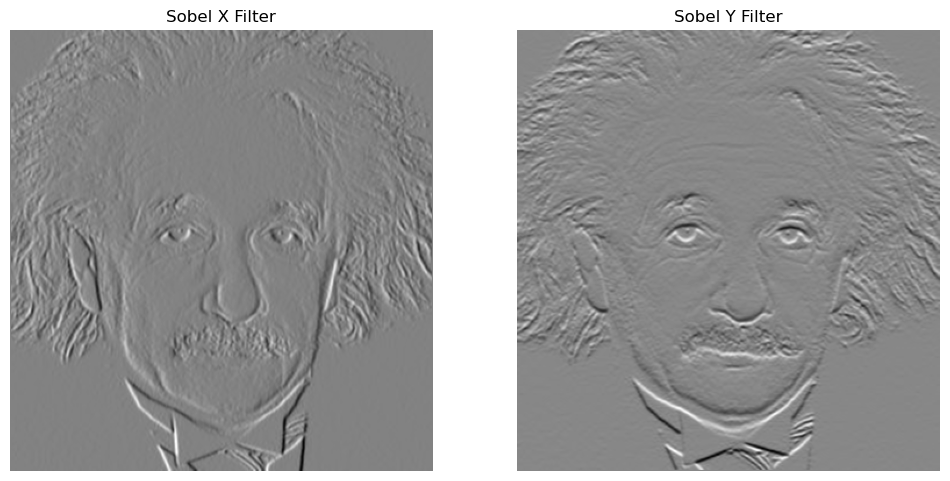

In [21]:
img7_sobel_x1 = cv.filter2D(img7, cv.CV_64F, array1)
img7_sobel_x2 = cv.filter2D(img7_sobel_x1, cv.CV_64F, array2)

img7_sobel_y1 = cv.filter2D(img7, cv.CV_64F, array3)
img7_sobel_y2 = cv.filter2D(img7_sobel_y1, cv.CV_64F, array4)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(img7_sobel_x2, cmap='gray')
plt.axis('off')
plt.title('Sobel X Filter')

plt.subplot(1, 2, 2)
plt.imshow(img7_sobel_y2, cmap='gray')
plt.axis('off')
plt.title('Sobel Y Filter')

plt.show()

## Question 08

In [22]:
# Zoom function using nearest neighbours and bilinear interpolation

def zoom_img(image, factor, interpolation_method):
    if not(0 < factor <= 10):
        raise ValueError("Zooming factor should be in (0, 1]")
    
    (h, w) = image.shape[:2]
    new_h, new_w = h * factor, w * factor

    if interpolation_method == "nearest":
        return cv.resize(image, (new_w, new_h), interpolation=cv.INTER_NEAREST )
    
    elif interpolation_method == "bilinear":
        return cv.resize(image, (new_w, new_h), interpolation=cv.INTER_LINEAR )

In [23]:
def NSSD(img1, img2):
    if (img1.shape != img2.shape):
        raise ValueError("Input images should have same shape")
    
    ssd = np.sum((img1 - img2) ** 2)

    nssd = ssd / np.sum(img1 ** 2)

    return nssd

### Image 01

In [24]:
im01 = cv.imread("a1images/a1q5images/im01.png", cv.IMREAD_COLOR)
im01_small = cv.imread("a1images/a1q5images/im01small.png", cv.IMREAD_COLOR)

im01_zoomed_nearest = zoom_img(im01_small, 4, interpolation_method="nearest")
im01_zoomed_bilinear = zoom_img(im01_small, 4, interpolation_method="bilinear")

im01_zoomed_nearest_nssd = NSSD(im01, im01_zoomed_nearest)
im01_zoomed_bilinear_nssd = NSSD(im01, im01_zoomed_bilinear)

print(f"NSSD for Nearest Neighbour Interpolation: {im01_zoomed_nearest_nssd}")
print(f"NSSD for Bilinear Interpolation: {im01_zoomed_bilinear_nssd}")

NSSD for Nearest Neighbour Interpolation: 0.3198745166239323
NSSD for Bilinear Interpolation: 0.3175103293330475


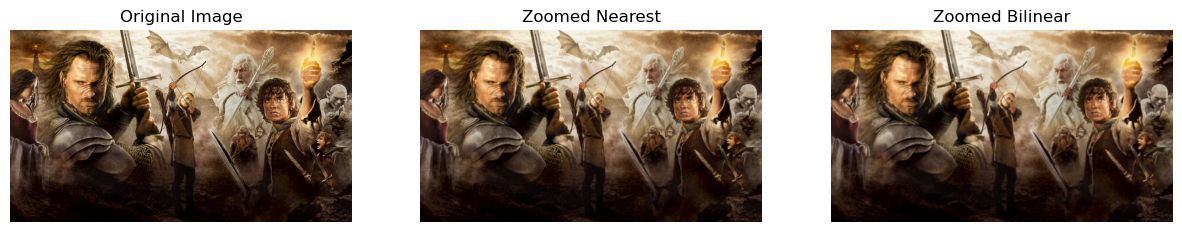

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv.cvtColor(im01, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im01_zoomed_nearest, cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Nearest")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im01_zoomed_bilinear, cv.COLOR_BGR2RGB))
ax[2].set_title("Zoomed Bilinear")
ax[2].axis("off")

plt.show()

### Image 02

In [26]:
im02 = cv.imread("a1images/a1q5images/im02.png", cv.IMREAD_COLOR)
im02_small = cv.imread("a1images/a1q5images/im02small.png", cv.IMREAD_COLOR)

im02_zoomed_nearest = zoom_img(im02_small, 4, interpolation_method="nearest")
im02_zoomed_bilinear = zoom_img(im02_small, 4, interpolation_method="bilinear")

im02_zoomed_nearest_nssd = NSSD(im02, im02_zoomed_nearest)
im02_zoomed_bilinear_nssd = NSSD(im02, im02_zoomed_bilinear)

print(f"NSSD for Nearest Neighbour Interpolation: {im02_zoomed_nearest_nssd}")
print(f"NSSD for Bilinear Interpolation: {im02_zoomed_bilinear_nssd}")

NSSD for Nearest Neighbour Interpolation: 0.10512274929879548
NSSD for Bilinear Interpolation: 0.09435592404356727


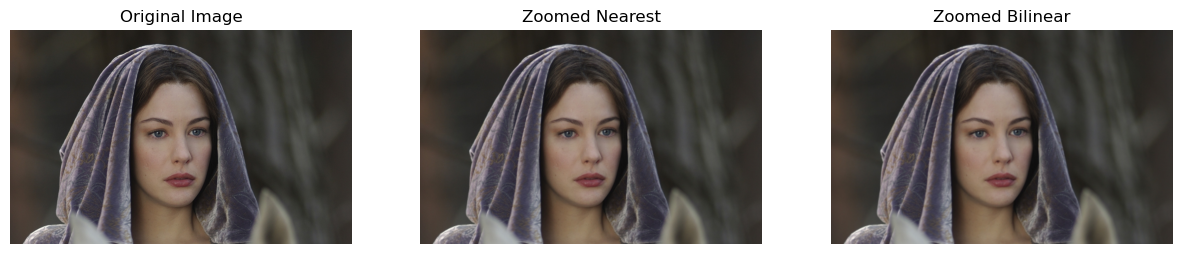

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv.cvtColor(im02, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im02_zoomed_nearest, cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Nearest")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im02_zoomed_bilinear, cv.COLOR_BGR2RGB))
ax[2].set_title("Zoomed Bilinear")
ax[2].axis("off")

plt.show()

### Image 03

In [28]:
im03 = cv.imread("a1images/a1q5images/im03.png", cv.IMREAD_COLOR)
im03_small = cv.imread("a1images/a1q5images/im03small.png", cv.IMREAD_COLOR)

# reshape (1459, 2400, 3) to (1460, 2400, 3) by padding
im03 = np.pad(im03, ((0, 1), (0, 0), (0, 0)), mode='constant')

im03_zoomed_nearest = zoom_img(im03_small, 4, interpolation_method="nearest")
im03_zoomed_bilinear = zoom_img(im03_small, 4, interpolation_method="bilinear")

im03_zoomed_nearest_nssd = NSSD(im03, im03_zoomed_nearest)
im03_zoomed_bilinear_nssd = NSSD(im03, im03_zoomed_bilinear)

print(f"NSSD for Nearest Neighbour Interpolation: {im03_zoomed_nearest_nssd}")
print(f"NSSD for Bilinear Interpolation: {im03_zoomed_bilinear_nssd}")

NSSD for Nearest Neighbour Interpolation: 0.14929666815745513
NSSD for Bilinear Interpolation: 0.14405945499435233


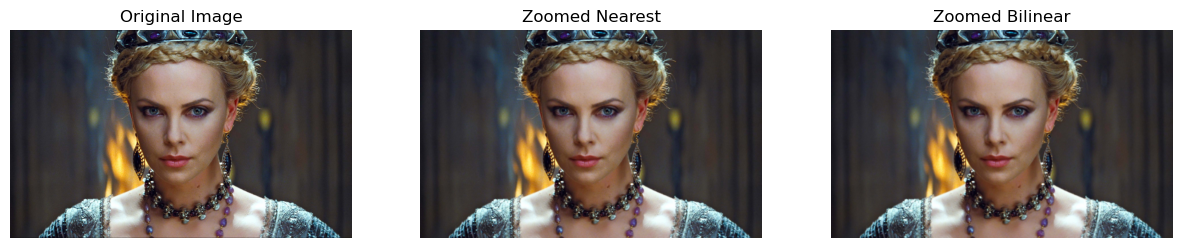

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv.cvtColor(im03, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im03_zoomed_nearest, cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Nearest")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im03_zoomed_bilinear, cv.COLOR_BGR2RGB))
ax[2].set_title("Zoomed Bilinear")
ax[2].axis("off")

plt.show()

### Image 04

In [30]:
im04 = cv.imread("a1images/a1q5images/taylor.jpg", cv.IMREAD_COLOR)
im04_small = cv.imread("a1images/a1q5images/taylor_small.jpg", cv.IMREAD_COLOR)

im04_zoomed_nearest = zoom_img(im04_small, 5, interpolation_method="nearest")
im04_zoomed_bilinear = zoom_img(im04_small, 5, interpolation_method="bilinear")

im04_zoomed_nearest_nssd = NSSD(im04, im04_zoomed_nearest)
im04_zoomed_bilinear_nssd = NSSD(im04, im04_zoomed_bilinear)

print(f"NSSD for Nearest Neighbour Interpolation: {im04_zoomed_nearest_nssd}")
print(f"NSSD for Bilinear Interpolation: {im04_zoomed_bilinear_nssd}")

NSSD for Nearest Neighbour Interpolation: 0.32075670410394136
NSSD for Bilinear Interpolation: 0.3159978097432713


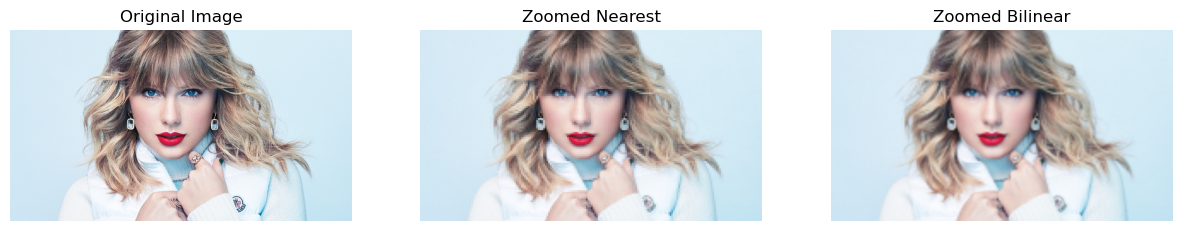

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv.cvtColor(im04, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im04_zoomed_nearest, cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Nearest")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im04_zoomed_bilinear, cv.COLOR_BGR2RGB))
ax[2].set_title("Zoomed Bilinear")
ax[2].axis("off")

plt.show()

## Question 9

In [32]:
img9 = cv.imread("a1images/daisy.jpg", cv.IMREAD_COLOR)

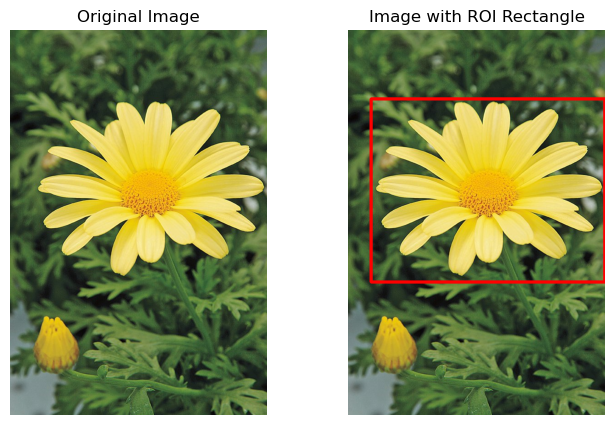

In [33]:
# Tuning rectangle position
img_with_rectangle = img9.copy()
cv.rectangle(img_with_rectangle, (50, 150), (560, 550), (0, 0, 255), 5)

plt.figure(figsize=(8, 5))

# Plotting image and image with ROI
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img9, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_with_rectangle, cv.COLOR_BGR2RGB))
plt.title("Image with ROI Rectangle")
plt.axis("off")

plt.show()


### part (a)

In [34]:
mask = np.zeros(img9.shape[:2], dtype=np.uint8)

backgroundModel = np.zeros((1, 65), dtype=np.float64)
foregroundModel = np.zeros((1, 65), dtype=np.float64)

rectangle = (50, 150, 510, 400)

In [35]:
cv.grabCut(img9, mask, rectangle, backgroundModel, foregroundModel, 5, cv.GC_INIT_WITH_RECT)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 3.56548445e-01,  3.41181780e-02,  3.02649539e-01,
          7.87431477e-02,  2.27940691e-01,  5.16067503e+01,
          9.50801071e+01,  6.47598098e+01,  4.53189224e+01,
          1.40887482e+02,  1.61619374e+02,  3.57790922e+01,
          5.36107131e+01,  3.90554747e+01,  1.03567764e+02,
          1.19004159e+02,  1.00605822e+02,  6.55277556e+01,
          1.29167657e+02,  9.96116987e+01,  2.67531609e+01,
          5.26921409e+01,  3.59569485e+01,  5.26921409e+01,
          1.54975715e+02,  8.90875855e+01,  3.59569485e+01,
          8.90875855e+01,  7.42022729e+01,  4.16917646e+02,
          3.94474832e+01, -5.03336833e+01,  3.94474832e+01,
          1.70724182e+03,  2.09834586e+03, -5.03336833e+01,
          2.09834586e+03,  2.72244433e+03,  6.70705963

In [36]:
fg_mask = np.where((mask==2)|(mask==0), 0, 1).astype(np.uint8)
img9_fg = img9 * fg_mask[:,:,np.newaxis]

bg_mask = np.where((mask==1)|(mask==3), 0, 1).astype(np.uint8)
img9_bg = img9 * bg_mask[:,:,np.newaxis]

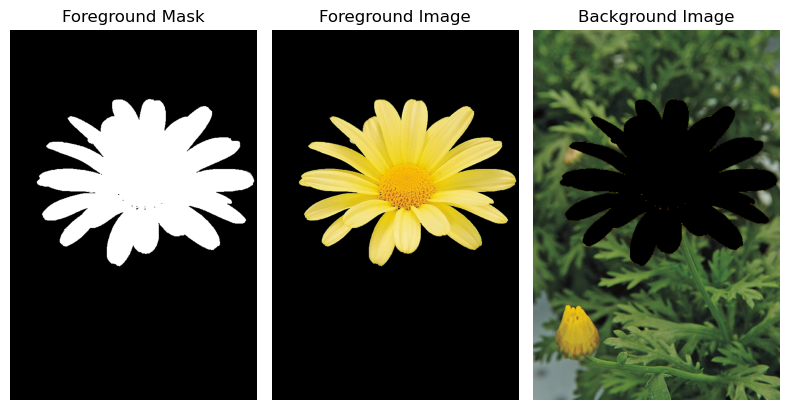

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))

ax[0].imshow(fg_mask, cmap='gray')
ax[0].set_title("Foreground Mask")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img9_fg, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(img9_bg, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()


### part (b)

In [38]:
img9_bg_blurred = cv.GaussianBlur(img9_bg,(21,21),0)

img9_enhanced = cv.add(img9_fg, img9_bg_blurred)

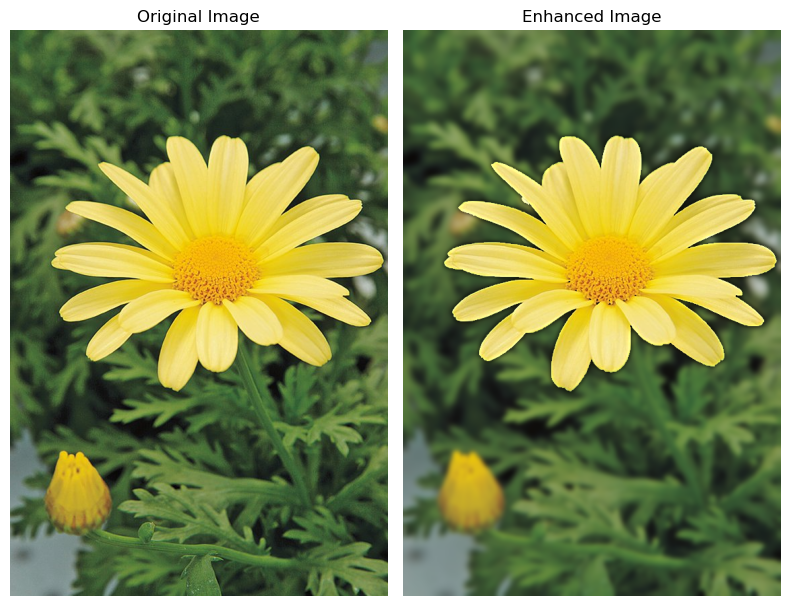

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))

ax[0].imshow(cv.cvtColor(img9, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img9_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()
